In [1]:
# import packages we need for exploratory data analysis (EDA)
import pandas as pd # to store tabular data
import numpy as np # to do some math
import matplotlib.pyplot as plt # a popular data visualization tool
import seaborn as sns # another popular data visualization tool
%matplotlib inline
plt.style.use('fivethirtyeight') # a popular data visualization theme

In [2]:
# load in our dataset using pandas
pima = pd.read_csv('./data/diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Our number of missing values is (incorrectly) 0
pima['Insulin'].isnull().sum() #serum insulin

0

In [4]:
#manually replace all 0's with a None value
pima['Insulin'] = pima['Insulin'].map(lambda x:x if x != 0 else None)


In [5]:
# check the number of mssing values again
pima['Insulin'].isnull().sum()

374

In [6]:
# A little faster now for all columns
columns = ['Insulin','BMI','Glucose','BloodPressure', 'SkinThickness']

for col in columns:
    pima[col].replace([0],[None],inplace=True)

In [7]:
pima.isnull().sum() # this makes more sense now!

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,None,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [9]:
pima.describe() # grab some descriptive statistics

,Pregnancies,Insulin,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,394.000000,768.000000,768.000000,768.000000
mean,3.845052,155.548223,0.471876,33.240885,0.348958
std,3.369578,118.775855,0.331329,11.760232,0.476951
min,0.000000,14.000000,0.078000,21.000000,0.000000
25%,1.000000,76.250000,0.243750,24.000000,0.000000
50%,3.000000,125.000000,0.372500,29.000000,0.000000
75%,6.000000,190.000000,0.626250,41.000000,1.000000
max,17.000000,846.000000,2.420000,81.000000,1.000000


In [10]:
pima['Glucose'].mean(), pima['Glucose'].std()

(121.6867627785059, 30.53564107280403)

### Removing Harmful Rows of Data

In [11]:
# drop the rows with missing values
pima_dropped = pima.dropna()

In [12]:
num_rows_lost = round(100*(pima.shape[0] - pima_dropped.shape[0])/float(pima.shape[0]))

print("retained {}% of rows".format(num_rows_lost))
# lost over half of the rows!

retained 49% of rows


In [13]:
# some EDA of the dataset before it was dropped and after

# split of trues and falses before rows dropped
pima['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [14]:
# the split of trues and falses stay relatively the same
pima_dropped['Outcome'].value_counts(normalize=True)

0    0.668367
1    0.331633
Name: Outcome, dtype: float64

In [15]:
# the mean values of each column (excluding missing values)
pima.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [16]:
# the mean values of each column (with missing values rows dropped)
pima_dropped.mean()

Pregnancies                   3.301020
Glucose                     122.627551
BloodPressure                70.663265
SkinThickness                29.145408
Insulin                     156.056122
BMI                          33.086224
DiabetesPedigreeFunction      0.523046
Age                          30.864796
Outcome                       0.331633
dtype: float64

In [17]:
# % change in means
(pima_dropped.mean() - pima.mean()) / pima.mean()

Pregnancies                -0.141489
Glucose                     0.007731
BloodPressure              -0.024058
SkinThickness              -0.000275
Insulin                     0.003265
BMI                         0.019372
DiabetesPedigreeFunction    0.108439
Age                        -0.071481
Outcome                    -0.049650
dtype: float64

Text(0,0.5,'% change')

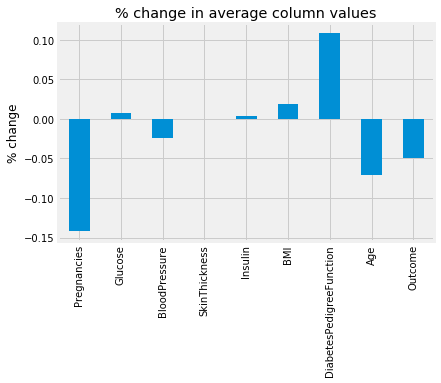

In [18]:
# % change in means as a bar chart
ax = ((pima_dropped.mean() - pima.mean()) / pima.mean()).plot(kind='bar', color='#008fd5', title='% change in average column values')
ax.set_ylabel('% change')



In [19]:
# now lets do some machine learning
# note we are using the dataset with the dropped rows

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_dropped = pima_dropped.drop('Outcome', axis = 1)
#create our feature matrix by removing the response variable
print("learning from {} rows".format(X_dropped.shape[0]))
y_dropped=pima_dropped['Outcome']

# our grid search variables and instances

# KNN parameters to try
knn_params = {'n_neighbors':[1,2,3,4,5,6,7]}

knn=KNeighborsClassifier()  # instantiate a KNN model

grid = GridSearchCV(knn, knn_params)
grid.fit(X_dropped, y_dropped)

print(grid.best_score_, grid.best_params_) # but we are learning from way fewer rows



learning from 392 rows
0.7448979591836735 {'n_neighbors': 7}


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [21]:
X_dropped = pima_dropped.drop('Outcome', axis=1)
# create our feature matrix by removing the respose variable
print("learning from {} rows".format(X_dropped.shape[0]))

learning from 392 rows


In [22]:
y_dropped = pima_dropped['Outcome']

In [23]:
# our grid search variables and instances

# KNN parameters to try

knn_params = {'n_neighbors':[1,2,3,4,5,6,7]}

In [24]:
grid = GridSearchCV(knn, knn_params)
grid.fit(X_dropped, y_dropped)

print(grid.best_score_, grid.best_params_)
# but we are learning from way fewer rows

0.7448979591836735 {'n_neighbors': 7}


In [25]:
pima.isnull().sum() # let's fill in the plasma column

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [26]:
empty_plasma_index = pima[pima['Glucose'].isnull()].index
pima.loc[empty_plasma_index]['Glucose']

75     None
182    None
342    None
349    None
502    None
Name: Glucose, dtype: object

In [27]:
#fill the columns missing values with mean of the rest of the column
pima['Glucose'].fillna(pima['Glucose'].mean(), inplace = True)
pima.isnull().sum() # the column should now have 0 missing values

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [28]:
pima.loc[empty_plasma_index]['Glucose']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: Glucose, dtype: float64

In [29]:
from sklearn.preprocessing import Imputer

In [30]:
imputer = Imputer(strategy='mean')

In [31]:
pima_imputed = imputer.fit_transform(pima)

In [32]:
type(pima_imputed) # comes out as an array

numpy.ndarray

In [33]:
# turn our numpy array back into a pandas DataFrame object
pima_imputed = pd.DataFrame(pima_imputed, columns=pima.columns)

In [35]:
# notice for example the SkinThickness missing values were replaced with 29.15342
pima_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [36]:
pima_imputed.loc[empty_plasma_index]['Glucose']
# same values as we obtained with fillna

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: Glucose, dtype: float64

In [37]:
# no missing values
pima_imputed.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [38]:
# impute values with 0
pima_zero = pima.fillna(0)

X_zero = pima_zero.drop('Outcome', axis = 1)
print("learning from {} rows".format(X_zero.shape[0]))
y_zero = pima_zero['Outcome']

knn_params = {'n_neighbors':[1,2,3,4,5,6,7]}
grid = GridSearchCV(knn, knn_params)
grid.fit(X_zero, y_zero)

# if the values stayed at 0, our accuracy goes down
print(grid.best_score_, grid.best_params_)

learning from 768 rows
0.7330729166666666 {'n_neighbors': 6}


### Imputing values in a machine learning pipeline

In [42]:
from sklearn.model_selection import train_test_split

X = pima[['Insulin']].copy()
y = pima['Outcome'].copy()

X.isnull().sum()

Insulin    374
dtype: int64

In [43]:
# the imporoper way... imputing values BEFORE splitting

# take the entire datasets mean
entire_data_set_mean = X.mean()

# and use it to fill in a the missing spots
X = X.fillna(entire_data_set_mean)

print(entire_data_set_mean)

# Take the split using a random state so that we can examine the same split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

Insulin    155.548223
dtype: float64


In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test, y_test)
# the accuracy of the imporper split

0.65625

In [47]:
# the propper way... imputuing values After splitting
from sklearn.model_selection import train_test_split

X = pima[['Insulin']].copy()
y = pima[['Outcome']].copy()

# using the same random state to obtain the same split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=99)

X.isnull().sum()


Insulin    374
dtype: int64

In [48]:
training_mean = X_train.mean()
X_train = X_train.fillna(training_mean)
X_test = X_test.fillna(training_mean)

# not the entire dataset's mean, it's much higher
print(training_mean)



Insulin    158.546053
dtype: float64


In [57]:
knn = KNeighborsClassifier()
# knn.fit(X_train, y_train) # received warning with y_train, using code below
knn.fit(X_train, y_train.Outcome) # using y_train.Outcome due to warning 

# lower accuracy, but much more honest in the mode's abaility to generalize a pattern to outside data
print(knn.score(X_test, y_test))

0.4895833333333333
